# ***Heart Disease Diagnostic Analysis***

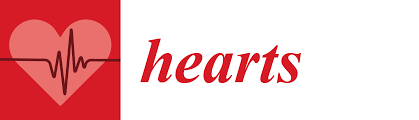

Heart disease is a term covering any disorder of the heart. Heart diseases have 
become a major concern to deal with as studies show that the number of 
deaths due to heart diseases have increased significantly over the past few 
decades in India it has become the leading cause of death in India. A study 
shows that from 1990 to 2016 the death rate due to heart diseases have 
increased around 34% from 155.7 to 209.1 deaths per 1 lakh population in 
India. 
Thus, preventing heart diseases has become more than necessary. Good data-driven systems for predicting heart diseases can improve the entire research 
and prevention process, making sure that more people can live healthy lives.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

In [2]:
df=pd.read_csv("heart_disease_dataset.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  num       303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### ATTRIBUTES

There are thirteen features in Dataset<br>

age: The person's age in years<br>

sex: The person's sex (1 = male, 0 = female)<br>

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)<br>

trestbps: The person's resting blood pressure (mm/Hg on admission to the hospital)<br>

chol: The person's cholesterol measurement in mg/dl<br>

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)<br>

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)<br>

thalach: The person's maximum heart rate achieved<br>

exang: Exercise induced angina (1 = yes; 0 = no)<br>

oldpeak: ST depression induced by exercise relative to rest<br>

slope: the slope of the peak exercise ST segment (Value 2: upsloping, Value 1: flat, Value 0: downsloping)<br>

ca: The number of major vessels (0-3)<br>

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defectt)<br>

num: Heart disease (0 = no, 1 = yes)<br>


### PANDAS PROFILE REPORT

In [6]:
from pandas_profiling import ProfileReport

In [7]:
profile=ProfileReport(df,title="pandas profile report")

In [8]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

### Describing the basic statistics of the data.

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,-1319.468647,-655.363036,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,11432.566205,8111.366638,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,-100000.000000,-100000.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [8]:
df.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
num           2
dtype: int64

### Checking Unique Values In CA

In [9]:
df['ca'].value_counts()

 0         176
 1          65
 2          38
 3          20
-100000      4
Name: ca, dtype: int64

In "ca" there should be 4 values.The number of major vessels (0-3).Changing 5th Value to NAN.

In [10]:
df.loc[df['ca']==-100000,'ca']=np.NaN

In [11]:
df['ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

### CHECKING UNIQUE VALUES IN thal

In [12]:
df['thal'].value_counts()

 3         166
 7         117
 6          18
-100000      2
Name: thal, dtype: int64

same as "ca" in "thal" we have 4 values but according to given information we have 3 so changing 4th value to nan

In [13]:
df[df['thal']==-100000]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,-100000,0
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,-100000,1


In [14]:
df.loc[df['thal']==-100000,'thal']=np.NaN

In [15]:
df['thal'].value_counts()

3.0    166
7.0    117
6.0     18
Name: thal, dtype: int64

In [16]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

We changed invalid values in "ca" and "thal" with nan.
Now we have NaN values in it.So replace it with median

In [17]:
df=df.fillna(df.median())

In [18]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [19]:
df['thal'].unique()

array([6., 3., 7.])

In [20]:
df['ca'].unique()

array([0., 3., 2., 1.])

### HERE WE ARE CHANGING NUMERICAL VARIABLES INTO CATEGORICAL VALUES FOR EASY VISUALIZATION

In [21]:
df['num'] = df.num.replace({1: "Disease", 0: "No_disease"})
df['sex'] = df.sex.replace({1: "Male", 0: "Female"})
df['cp'] = df.cp.replace({1: "typical_angina", 
                          2: "atypical_angina", 
                          3:"non-anginal pain",
                          4: "asymtomatic"})
df['slope'] = df.slope.replace({1: "upsloping", 2: "flat",3:"downsloping"})
df['thal'] = df.thal.replace({6: "fixed_defect", 3: "reversable_defect", 7:"normal"})

In [22]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical_angina,145,233,1,2,150,0,2.3,downsloping,0.0,fixed_defect,No_disease
1,67,Male,asymtomatic,160,286,0,2,108,1,1.5,flat,3.0,reversable_defect,Disease
2,67,Male,asymtomatic,120,229,0,2,129,1,2.6,flat,2.0,normal,Disease
3,37,Male,non-anginal pain,130,250,0,0,187,0,3.5,downsloping,0.0,reversable_defect,No_disease
4,41,Female,atypical_angina,130,204,0,2,172,0,1.4,upsloping,0.0,reversable_defect,No_disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,Male,typical_angina,110,264,0,0,132,0,1.2,flat,0.0,normal,Disease
299,68,Male,asymtomatic,144,193,1,0,141,0,3.4,flat,2.0,normal,Disease
300,57,Male,asymtomatic,130,131,0,0,115,1,1.2,flat,1.0,normal,Disease
301,57,Female,atypical_angina,130,236,0,2,174,0,0.0,flat,1.0,reversable_defect,Disease


# Data Visualization

### Heart Diseases Population Percentage

In [23]:
x=df['num'].value_counts()

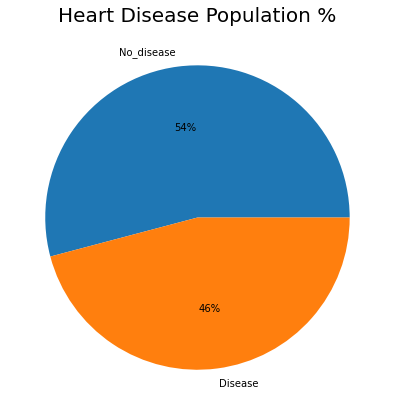

In [24]:
plt.figure(figsize=(10,7))
plt.pie(x, labels=['No_disease','Disease'], autopct='%0.0f%%')
plt.title('Heart Disease Population %', fontsize=20)
plt.show()

From the overall population, 46% people having heart disease & 56% people having no heart disease

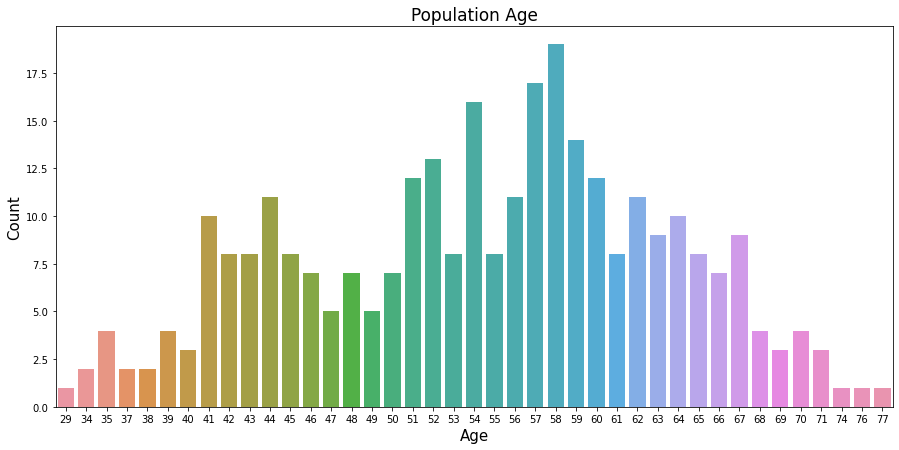

In [25]:
#Countplot of Population Age

plt.figure(figsize=(15,7))
sns.countplot(x='age', data=df)
plt.title('Population Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

#### By Observation, we can divided age into the 3 Age_Range 'elder_age','middle-age', 'young_age'.

In [26]:
#Statistical Analysis

Min_Age=df['age'].min()
Max_Age=df['age'].max()
Mean_Age=df['age'].mean()
print("Minimum Age =",Min_Age)
print("Maximum Age =",Max_Age)
print("Mean Age =",Mean_Age)

Minimum Age = 29
Maximum Age = 77
Mean Age = 54.43894389438944


In [27]:
#Categorical Analysis

Young_Age=df[(df['age']>=29) & (df['age']<40)]
Middle_Age=df[(df['age']>=40) & (df['age']<55)]
Elder_Age=df[(df['age']>55)]
print('Young Age =',len(Young_Age))
print('Middle Age =',len(Middle_Age))
print('Elder Age =',len(Elder_Age))

Young Age = 15
Middle Age = 128
Elder Age = 152


In [28]:
#Converting Numerical Data into Categorical Data

def age_range(row):
    if row>=29 and row<40:
        return 'Young_Age'
    elif row>=40 and row<55:
        return 'Middle_Age'
    elif row>55:
        return 'Elder_Age'

In [29]:
df['Age_Range']=df['age'].apply(age_range)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Age_Range
0,63,Male,typical_angina,145,233,1,2,150,0,2.3,downsloping,0.0,fixed_defect,No_disease,Elder_Age
1,67,Male,asymtomatic,160,286,0,2,108,1,1.5,flat,3.0,reversable_defect,Disease,Elder_Age
2,67,Male,asymtomatic,120,229,0,2,129,1,2.6,flat,2.0,normal,Disease,Elder_Age
3,37,Male,non-anginal pain,130,250,0,0,187,0,3.5,downsloping,0.0,reversable_defect,No_disease,Young_Age
4,41,Female,atypical_angina,130,204,0,2,172,0,1.4,upsloping,0.0,reversable_defect,No_disease,Middle_Age


In [31]:
df['Age_Range'].value_counts()

Elder_Age     152
Middle_Age    128
Young_Age      15
Name: Age_Range, dtype: int64

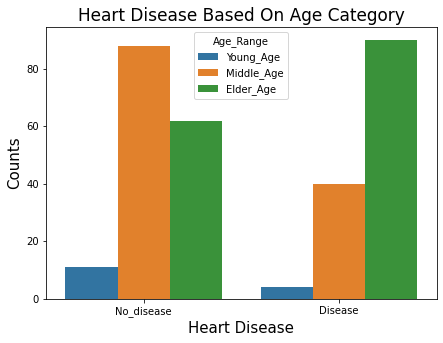

In [32]:
#Heart Disease Based On Age Category

plt.figure(figsize=(7,5))
sns.countplot(x='num', hue='Age_Range', data=df, hue_order=['Young_Age', 'Middle_Age','Elder_Age'])
plt.title('Heart Disease Based On Age Category', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Elder Age People are most affected by Heart Disease & Middle Age People are mostly FREE from any kind of Disease

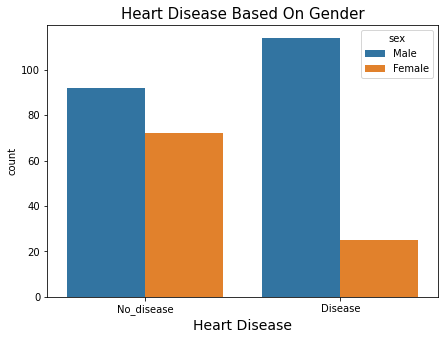

In [33]:
# Heart Disease Based On Gender
plt.figure(figsize=(7,5))
sns.countplot(x='num',hue='sex',data=df)
plt.xlabel('Heart Disease',fontsize=14)
plt.title('Heart Disease Based On Gender',fontsize=15)
plt.show()

Males are more prone to Heart Disease

# Analysis On Chest Pain

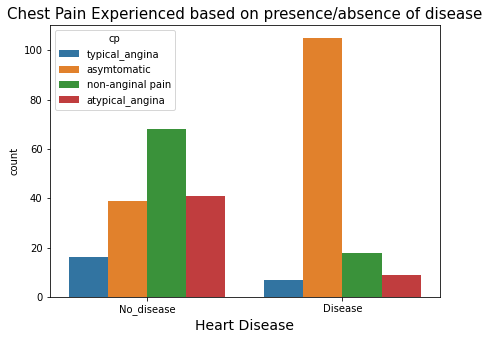

In [34]:
# Chest Pain Experienced based on presence or absence of disease

plt.figure(figsize=(7,5))
sns.countplot(x='num',hue='cp',data=df)
plt.xlabel('Heart Disease',fontsize=14)
plt.title('Chest Pain Experienced based on presence/absence of disease',fontsize=15)
plt.show()

People having asymptomatic chest pain have a higher chance of heart disease

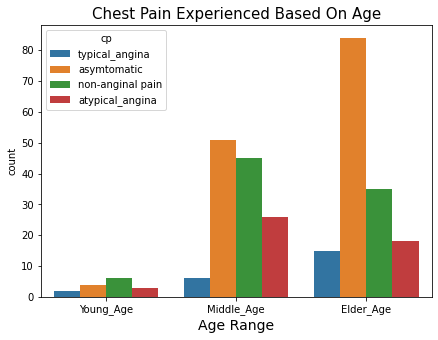

In [35]:
# Chest Pain Experienced based on Age

plt.figure(figsize=(7,5))
sns.countplot(x='Age_Range',hue='cp',data=df,order=['Young_Age','Middle_Age','Elder_Age'])
plt.xlabel('Age Range',fontsize=14)
plt.title('Chest Pain Experienced Based On Age',fontsize=15)
plt.show()

Higher number of Asymptomatic Pain in Elderly age

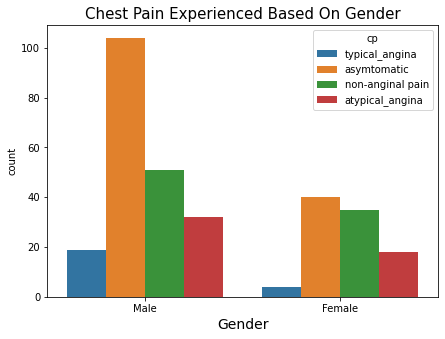

In [36]:
# Chest Pain Experienced based on Gender

plt.figure(figsize=(7,5))
sns.countplot(x='sex',hue='cp',data=df)
plt.xlabel('Gender',fontsize=14)
plt.title('Chest Pain Experienced Based On Gender',fontsize=15)
plt.show()

Higher number of men are suffering from Asymptomatic type of Chest Pain

## Analysis On Blood Pressure

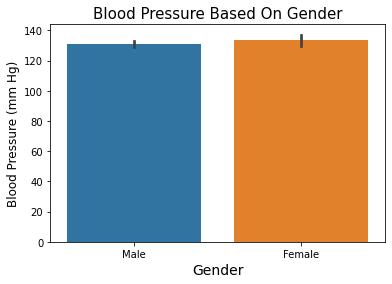

In [37]:
# Blood Pressure Based on Gender

sns.barplot(x='sex', y='trestbps', data=df)
plt.title("Blood Pressure Based On Gender", fontsize=15)
plt.xlabel('Gender',fontsize=14)
plt.ylabel("Blood Pressure (mm Hg)", fontsize=12)
plt.show()

Blood Pressure Rate is almost equal in Males and Females

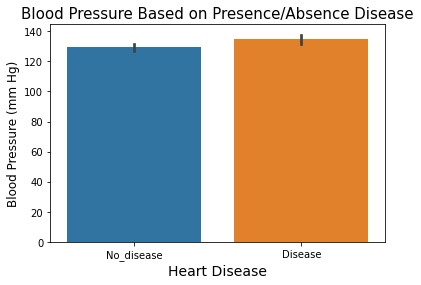

In [38]:
# Blood Pressure Based on Presence/Absence Disease

sns.barplot(x='num', y='trestbps', data=df)
plt.title("Blood Pressure Based on Presence/Absence Disease", fontsize=15)
plt.xlabel('Heart Disease',fontsize=14)
plt.ylabel("Blood Pressure (mm Hg)", fontsize=12)
plt.show()

Higher Blood Pressure Level Have Chances Of Heart Disease

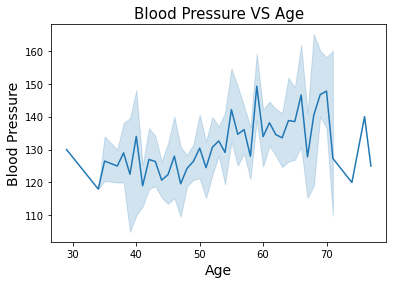

In [39]:
# Blood Pressure Based on Age

sns.lineplot(x='age', y='trestbps', data=df)
plt.title('Blood Pressure VS Age', fontsize=15)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Blood Pressure', fontsize=14)
plt.show()

Blood Pressure increases between age of 50 to 60 and continue till 70

## Analysis On Cholestrol Level

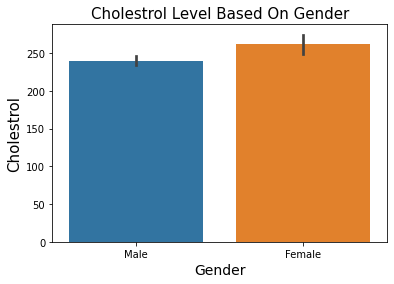

In [40]:
# Cholestrol Level Based On Gender

sns.barplot(x='sex', y='chol', data=df)
plt.title("Cholestrol Level Based On Gender", fontsize=15)
plt.xlabel('Gender',fontsize=14)
plt.ylabel("Cholestrol", fontsize=15)
plt.show()

Cholestrol Level higher in female than male

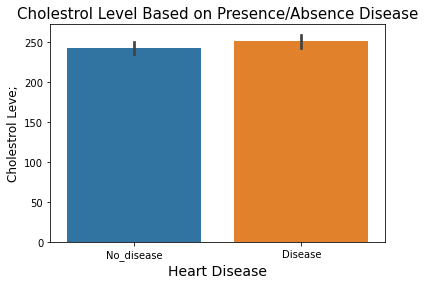

In [41]:
# Cholestrol Level Based on Presence/Absence Disease

sns.barplot(x='num', y='chol', data=df)
plt.title("Cholestrol Level Based on Presence/Absence Disease", fontsize=15)
plt.xlabel('Heart Disease',fontsize=14)
plt.ylabel("Cholestrol Leve;", fontsize=12)
plt.show()

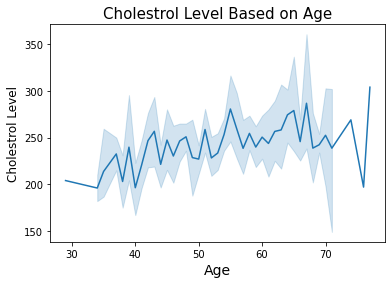

In [42]:
# Cholestrol Level Based on Age

sns.lineplot(x='age', y='chol', data=df)
plt.title("Cholestrol Level Based on Age", fontsize=15)
plt.xlabel('Age',fontsize=14)
plt.ylabel("Cholestrol Level", fontsize=12)
plt.show()

Cholestrol Increasing after age of 50

## Analysis On ST Depression

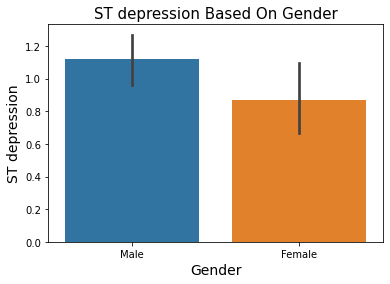

In [43]:
#ST Depression Based On Gender

sns.barplot(x='sex', y='oldpeak', data=df)
plt.title('ST depression Based On Gender', fontsize=15)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('ST depression', fontsize=14)
plt.show()

ST Depression More in male than female

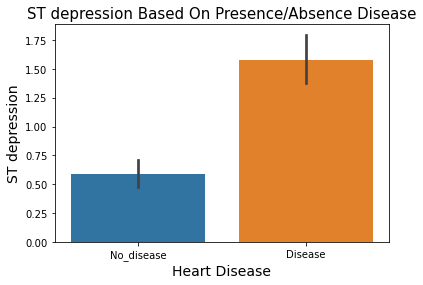

In [44]:
# ST depression Based On Presence/Absence Disease

sns.barplot(x='num', y='oldpeak', data=df)
plt.title('ST depression Based On Presence/Absence Disease', fontsize=15)
plt.xlabel('Heart Disease', fontsize=14)
plt.ylabel('ST depression', fontsize=14)
plt.show()

High ST Depression have chances of heart disease

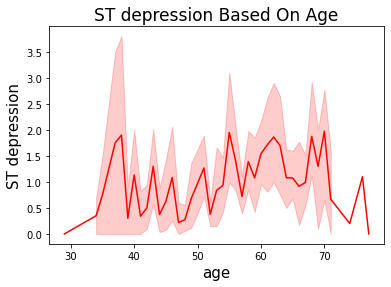

In [45]:
# ST depression Based On Age

sns.lineplot(x='age', y='oldpeak', data=df,color='r')
plt.title('ST depression Based On Age', fontsize=17)
plt.xlabel('age', fontsize=15)
plt.ylabel('ST depression', fontsize=15)
plt.show()

ST Depression mostly increases between the age group of 30-40

## Analysis On Max Heart Rate

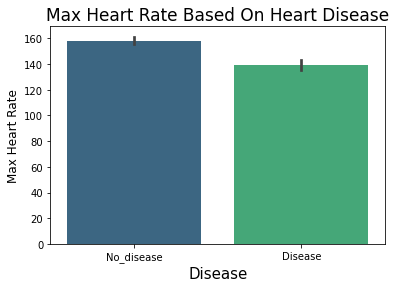

In [46]:
# Max Heart Rate Based On Heart Disease

sns.barplot(x='num', y='thalach', data=df, palette='viridis')
plt.title("Max Heart Rate Based On Heart Disease", fontsize=17)
plt.xlabel('Disease',fontsize=15)
plt.ylabel("Max Heart Rate", fontsize=12)
plt.show()

Higher Blood Pressure Level results Chances Of Heart Disease

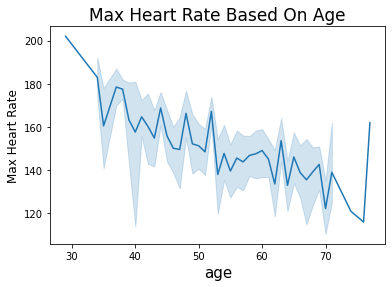

In [47]:
#Max Heart Rate Based On Age

sns.lineplot(x='age', y='thalach', data=df, palette='plasma')
plt.title("Max Heart Rate Based On Age", fontsize=17)
plt.xlabel('age',fontsize=15)
plt.ylabel("Max Heart Rate", fontsize=12)
plt.show()

## Analysis On Fasting Blood Sugar

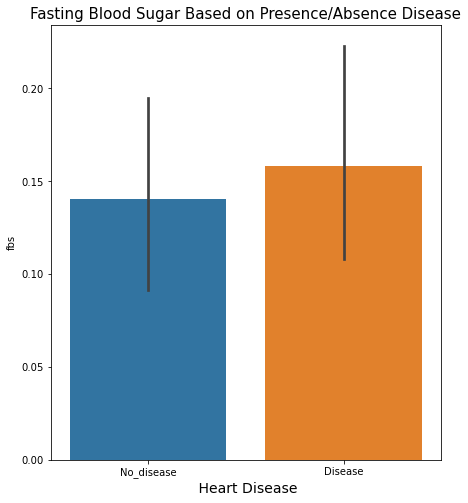

In [48]:
# Fasting Blood Sugar Based on Presence/Absence Disease

plt.figure(figsize=(7,8))
sns.barplot(x='num',y='fbs',data=df)
plt.title("Fasting Blood Sugar Based on Presence/Absence Disease",fontsize=15)
plt.xlabel(' Heart Disease',fontsize=14)
plt.show()

More Fasting Blood Sugar may have chances of heart disease

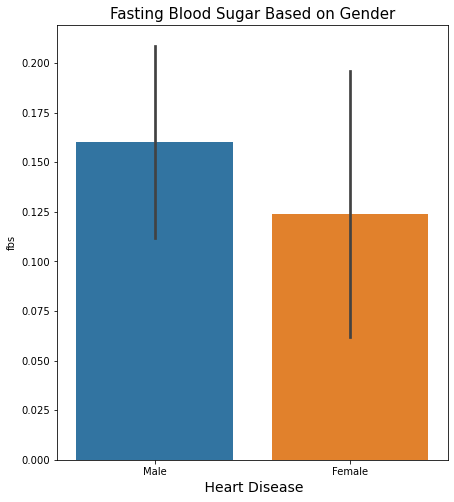

In [49]:
#Fasting Blood Sugar Based on Gender

plt.figure(figsize=(7,8))
sns.barplot(x='sex',y='fbs',data=df)
plt.title("Fasting Blood Sugar Based on Gender",fontsize=15)
plt.xlabel(' Heart Disease',fontsize=14)
plt.show()

Fasting Blood Sugar more in male than female

## Analysis On Excercise Induced Angina

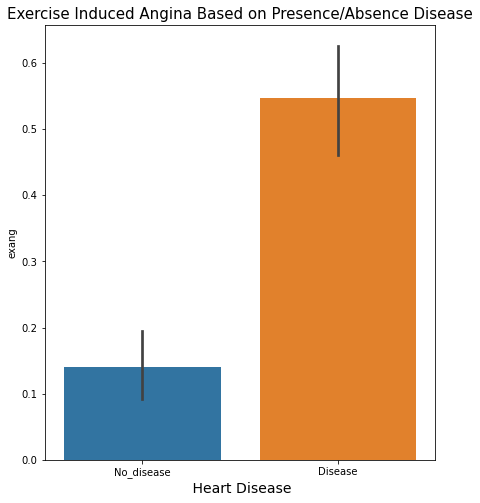

In [50]:
# Exercise Induced Angina Based on Presence/Absence Disease

plt.figure(figsize=(7,8))
sns.barplot(x='num',y='exang',data=df)
plt.title("Exercise Induced Angina Based on Presence/Absence Disease",fontsize=15)
plt.xlabel(' Heart Disease',fontsize=14)
plt.show()

If patient suffer from Angina, he/she may be concerned that exercise will make their symptoms worse

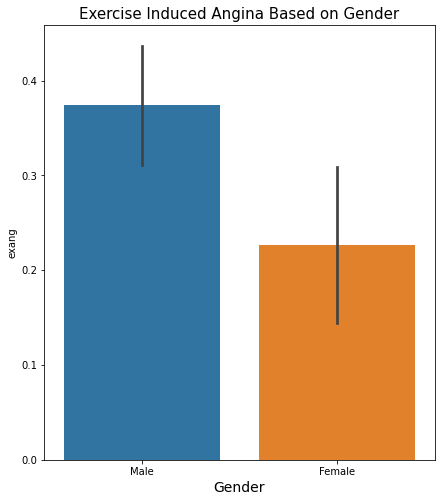

In [51]:
#Exercise Induced Angina Based on Gender

plt.figure(figsize=(7,8))
sns.barplot(x='sex',y='exang',data=df)
plt.title("Exercise Induced Angina Based on Gender",fontsize=15)
plt.xlabel('Gender',fontsize=14)
plt.show()

 Males have have high Exercise Angina

## Heatmap

<AxesSubplot:>

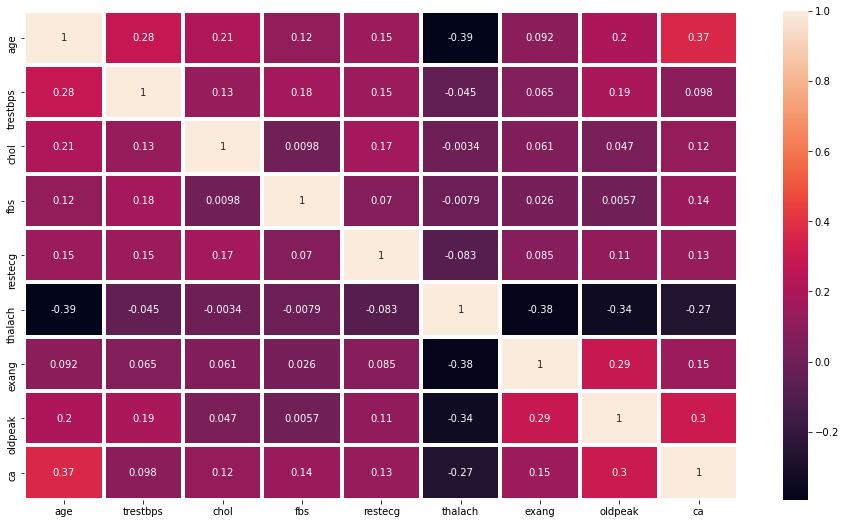

In [52]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), annot=True, linewidth=3)

##### From above observation we conclude <br>
1.From the overall population, 46% people having heart disease & 56% people having no heart disease<br>
2.Elder Age People are most affected by Heart Disease & Middle Age People are mostly FREE from any kind of Disease<br>
3.Males are more prone to Heart Disease than female<br>
4.People having asymptomatic chest pain have a higher chance of heart disease<br>
5.Elderly Age people have Higher number of Asymptomatic Pain<br>
6.Higher Blood Pressure Level Have Chances Of Heart Disease<br>
7.Blood Pressure increases between age of 50 to 60 and continue till 70<br>
8.Cholestrol Level higher in female than male<br>
9.Higher Cholestrol Level have chances of heart disease<br>
10.High ST Depression have chances of heart disease<br>
11.ST Depression mostly increases between the age group of 30-40<br>
12.More Fasting Blood Sugar may have chances of heart disease<br>
13.If patient suffer from Angina, he/she may be concerned that exercise will make their symptoms worse<br>

In [62]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Age_Range
0,63,Male,typical_angina,145,233,1,2,150,0,2.3,downsloping,0.0,fixed_defect,No_disease,Elder_Age
1,67,Male,asymtomatic,160,286,0,2,108,1,1.5,flat,3.0,reversable_defect,Disease,Elder_Age
2,67,Male,asymtomatic,120,229,0,2,129,1,2.6,flat,2.0,normal,Disease,Elder_Age
3,37,Male,non-anginal pain,130,250,0,0,187,0,3.5,downsloping,0.0,reversable_defect,No_disease,Young_Age
4,41,Female,atypical_angina,130,204,0,2,172,0,1.4,upsloping,0.0,reversable_defect,No_disease,Middle_Age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,Male,typical_angina,110,264,0,0,132,0,1.2,flat,0.0,normal,Disease,Middle_Age
299,68,Male,asymtomatic,144,193,1,0,141,0,3.4,flat,2.0,normal,Disease,Elder_Age
300,57,Male,asymtomatic,130,131,0,0,115,1,1.2,flat,1.0,normal,Disease,Elder_Age
301,57,Female,atypical_angina,130,236,0,2,174,0,0.0,flat,1.0,reversable_defect,Disease,Elder_Age


In [61]:
df.to_csv(r'C:\Users\ASUS\Desktop\intership_project\new_heart_disease.csv',index=False)